# Projet de machine learning
*Par Mouslihou Chérif Haidara et Sanchez Wenceslas*

*__Pseudo RAMP:__ Orlogskapten*

----

Le but de ce projet est de __d'enchirir un dataset__ pour améliorer la prédiction du nombre de passager par vol aux US.

__Plan:__

1. [Construction du nouveau dataset](#construction)

2. [Feature engineering et sélection des variables](#feat)

3. [Modélisation et prédiction](#model)

4. [Résultats et conclusion](#conclu)

In [1]:
%matplotlib inline

import imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import holidays
import pandas_profiling
import seaborn as sns
import datetime

import os
import glob

import ast

import warnings


sns.set()
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

<a id= "construction"></a>
# Construction

In [210]:
dico_map_city= read_dictionary = np.load('data/airport_code.npy',allow_pickle='TRUE').item()
us_cities= pd.read_csv("data/uscities.csv")
weather_data= pd.read_csv("data/external_data.csv")
population_data= pd.read_csv("data/PEP_2013_PEPANNRES_with_ann.csv", header= 1)
household_data= pd.read_csv("data/ACS_13_5YR_S1903_with_ann.csv", header= 1)
oil_brent= pd.read_csv("data/brent-oil-prices/BrentOilPrices.csv")

fare_data_Q1_2011= pd.read_excel("data/fare/AverageFare_Q1_2011.xlsx", header= 1)
fare_data_Q2_2011= pd.read_excel("data/fare/AverageFare_Q2_2011.xlsx", header= 1)
fare_data_Q3_2011= pd.read_excel("data/fare/AverageFare_Q3_2011.xlsx", header= 1)
fare_data_Q4_2011= pd.read_excel("data/fare/AverageFare_Q4_2011.xlsx", header= 1)
fare_data_Q1_2012= pd.read_excel("data/fare/AverageFare_Q1_2012.xlsx", header= 1)
fare_data_Q2_2012= pd.read_excel("data/fare/AverageFare_Q2_2012.xlsx", header= 1)
fare_data_Q3_2012= pd.read_excel("data/fare/AverageFare_Q3_2012.xlsx", header= 1)
fare_data_Q4_2012= pd.read_excel("data/fare/AverageFare_Q4_2012.xlsx", header= 1)
fare_data_Q1_2013= pd.read_excel("data/fare/AverageFare_Q1_2013.xlsx", header= 1)
fare_data_Q2_2013= pd.read_excel("data/fare/AverageFare_Q2_2013.xlsx", header= 1)
fare_data_Q3_2013= pd.read_excel("data/fare/AverageFare_Q3_2013.xlsx", header= 1)
fare_data_Q4_2013= pd.read_excel("data/fare/AverageFare_Q4_2013.xlsx", header= 1)

passengers_data= pd.read_csv("data/passengers/combined_csv_passengers.csv")

In [211]:
# os.chdir("C:/Users/Wenceslas/Desktop/projet_ml/air_passengers/data/passengers")
# extension = 'csv'
# all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

# combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# #export to csv
# combined_csv.to_csv( "combined_csv_passengers.csv", index=False, encoding='utf-8-sig')

In [212]:
passengers_data= pd.read_csv("data/passengers/combined_csv_passengers.csv")

In [213]:
fare_data_Q1_2011= pd.read_excel("data/fare/AverageFare_Q1_2011.xlsx", header= 1)
fare_data_Q2_2011= pd.read_excel("data/fare/AverageFare_Q2_2011.xlsx", header= 1)
fare_data_Q3_2011= pd.read_excel("data/fare/AverageFare_Q3_2011.xlsx", header= 1)
fare_data_Q4_2011= pd.read_excel("data/fare/AverageFare_Q4_2011.xlsx", header= 1)
fare_data_Q1_2012= pd.read_excel("data/fare/AverageFare_Q1_2012.xlsx", header= 1)
fare_data_Q2_2012= pd.read_excel("data/fare/AverageFare_Q2_2012.xlsx", header= 1)
fare_data_Q3_2012= pd.read_excel("data/fare/AverageFare_Q3_2012.xlsx", header= 1)
fare_data_Q4_2012= pd.read_excel("data/fare/AverageFare_Q4_2012.xlsx", header= 1)
fare_data_Q1_2013= pd.read_excel("data/fare/AverageFare_Q1_2013.xlsx", header= 1)
fare_data_Q2_2013= pd.read_excel("data/fare/AverageFare_Q2_2013.xlsx", header= 1)
fare_data_Q3_2013= pd.read_excel("data/fare/AverageFare_Q3_2013.xlsx", header= 1)
fare_data_Q4_2013= pd.read_excel("data/fare/AverageFare_Q4_2013.xlsx", header= 1)

### Ajout de la localisation des aéroports

Pour considérer la localisation des aéroports, nous avons récupéré les lattitudes / longitudes des villes les plus proche de ces aéroports, pour plus tard calculer les distances.

[Disponible ici](https://simplemaps.com/data/us-cities)

In [214]:
data= weather_data.copy()
data["city_name"]= data["AirPort"].map(dico_map_city)

dico_city= {
"Las Vegas":"NV",
"Denver":"CO",
"Atlanta":"GA",
"Newark":"NY",
"Houston":"TX",
"Los Angeles":"CA",
"Dallas":"TX",
"Philadelphia":"PA",
"Miami":"FL",
"Detroit":"MI",
"Boston":"MA",
"Minneapolis":"MN",
"Charlotte":"NC",
"Orlando":"FL",
"Phoenix":"AZ"
}

good_cities= pd.DataFrame()
for k, v in dico_city.items():
    good_cities= pd.concat([good_cities
                            ,us_cities[np.logical_and(us_cities["city"] == k
                                                     ,us_cities["state_id"] == v)
                                      ]
                           ])
    
for v in ["New York", "Seattle","San Francisco", "Chicago"]:
    good_cities= pd.concat([good_cities, us_cities[us_cities["city"] == v
                                              ]
                       ])
good_cities.head(1)

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
11731,Las Vegas,Las Vegas,NV,Nevada,32003,Clark,32003,Clark,36.2333,-115.2654,2073045.0,1747.0,polygon,False,True,America/Los_Angeles,1,89107 89106 89104 89102 89101 89108 89138 8913...,1840020364


In [215]:
data2= data.merge(good_cities, how='left', left_on= "city_name"
                 , right_on= "city")

data2['Date']= pd.to_datetime(data2['Date'])

for i in range(6):
    data2["Date"+str((i+1))]= data2["Date"] + datetime.timedelta(days= (i+1))

data2.head(1)

,Date,AirPort,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees,city_name,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id,Date1,Date2,Date3,Date4,Date5,Date6
0,2011-09-01,ATL,35,29,24,21,18,14,79,56,32,1022,1019,1017,16,16,11,19,6,26.0,0.00,3,NaN,129,Atlanta,Atlanta,Atlanta,GA,Georgia,13121,Fulton,13121|13089|13067,Fulton|DeKalb|Cobb,33.7627,-84.4225,5228750.0,1384.0,polygon,False,True,America/New_York,1,30334 30331 30332 30309 30308 30305 30307 3030...,1840013660,2011-09-02,2011-09-03,2011-09-04,2011-09-05,2011-09-06,2011-09-07


In [216]:
data2.shape

(11040, 50)

In [217]:
# Ajout des jours de vacances
# flag si il y a un jour férier / vacances entre le jour du départ et 7 jours plus tard.
data3= data2.copy()

data3["Vacances"]= data3.apply(lambda row: 1
                                 if holidays.CountryHoliday('US', prov= None, state= row[27]).get(row[0]) != None
                                 or holidays.CountryHoliday('US', prov= None, state= row[27]).get(row[49]) != None
                                 or holidays.CountryHoliday('US', prov= None, state= row[27]).get(row[48]) != None
                                 or holidays.CountryHoliday('US', prov= None, state= row[27]).get(row[47]) != None
                                 or holidays.CountryHoliday('US', prov= None, state= row[27]).get(row[46]) != None
                                 or holidays.CountryHoliday('US', prov= None, state= row[27]).get(row[45]) != None
                                 or holidays.CountryHoliday('US', prov= None, state= row[27]).get(row[44]) != None
                                 else 0
                                 , axis= 1)
data3= data3.drop(columns= ["Date1", "Date2", "Date3", "Date4", "Date5", "Date6"])

In [218]:
data3.head()
data3["Vacances"].value_counts()

0    8300
1    2740
Name: Vacances, dtype: int64

### Ajout du prix du pétrole

Nous avons décidé de considéré le prix du pétrole, 1 mois, 3 mois et 6 mois avant la date de départ. En effet, cette variable pourrait avoir un effet sur les prix des billets (forte corrélation avec le prix du kérosène). Le fait de prendre plusieurs retards nous permet de prendre en considération les stock de carburant des entreprises et des produits financiers qu'elles possèdent.

[Disponible ici sur Kaggle](https://www.kaggle.com/mabusalah/brent-oil-prices)

In [219]:
# Ajout du cours du petrole
oil_brent["Date"]= pd.to_datetime(oil_brent["Date"], format="%b %d, %Y")

oil_brent['year'] = oil_brent['Date'].dt.year
oil_brent['month'] = oil_brent['Date'].dt.month

data3['Date']= pd.to_datetime(data3['Date'])

data3['year'] = data3['Date'].dt.year.apply(str)
data3['month'] = data3['Date'].dt.month.apply(str)
data3['Date1'] = data3['Date'] - datetime.timedelta(days= 30)
data3['Date3'] = data3['Date'] - datetime.timedelta(days= 90)
data3['Date6'] = data3['Date'] - datetime.timedelta(days= 180)

data3['month1'] = data3['Date1'].dt.month.apply(str)
data3['month3'] = data3['Date3'].dt.month.apply(str)
data3['month6'] = data3['Date6'].dt.month.apply(str)
data3['year1'] = data3['Date1'].dt.year.apply(str)
data3['year3'] = data3['Date3'].dt.year.apply(str)
data3['year6'] = data3['Date6'].dt.year.apply(str)


oil_brent["month"]= oil_brent["Date"].dt.month.apply(str)
oil_brent["year"]= oil_brent["Date"].dt.year.apply(str)

oil_brent_grouped= oil_brent.groupby(["month", "year"])["Price"].mean()

# oil_brent["Date"]= oil_brent["Date"].dt.date
# oil_brent["Date"]= oil_brent["Date"].apply(str)

data4= data3.merge(oil_brent_grouped, how='left', left_on= ["year1", "month1"]
                 , right_on= ["year", "month"])
data4= data4.rename(columns= {"Price":"Price1"})

data5= data4.merge(oil_brent_grouped, how='left', left_on= ["year3", "month3"]
                 , right_on= ["year", "month"])
data5= data5.rename(columns= {"Price":"Price3"})

data6= data5.merge(oil_brent_grouped, how='left', left_on= ["year6", "month6"]
                 , right_on= ["year", "month"])
data6= data6.rename(columns= {"Price":"Price6"})


#data6= data6.drop(columns= ["year", "month", "Date1", "Date3", "Date6", "month1", "month3", "month6"
                          # , "year1", "year3", "year6"])
# oil_brent.head()
# data3["month6"].unique()
# data3.head()

# oil_brent_grouped
data6.tail(1)

,Date,AirPort,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees,city_name,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id,Vacances,year,month,Date1,Date3,Date6,month1,month3,month6,year1,year3,year6,Price1,Price3,Price6
11039,2013-03-05,LGA,9,5,1,-3,-5,-7,61,49,37,1016,1015,1013,16,16,16,39,16,48.0,0.00,2,NaN,5,New York,New York,New York,NY,New York,36061,New York,36061,New York,40.6943,-73.9249,19354922.0,11083.0,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016,0,2013,3,2013-02-03,2012-12-05,2012-09-06,2,12,9,2013,2012,2012,116.050526,109.494,112.863684


### Ajout du dataset du prix du billet

Nous avons récupéré les prix du billet moyen pour chaque trimestre par états US de 2011 à 2013.

[Disponible ici sur le site Bureau of Transportations Statistics](https://www.transtats.bts.gov/AverageFare/)

In [220]:
data6["month"].value_counts()

10    1240
12    1240
1     1240
9     1200
11    1200
2     1140
3      720
8      620
5      620
7      620
6      600
4      600
Name: month, dtype: int64

In [221]:
data6["Quarter"]= data6["month"].apply(lambda x: "1" if x in ["1", "2", "3"] else (
                                      "2" if x in ["4", "5", "6"] else (
                                      "3" if x in ["7", "8", "9"] else "4"))
                                      )

In [222]:
data6["Quarter"].value_counts()

4    3680
1    3100
3    2440
2    1820
Name: Quarter, dtype: int64

In [223]:
fare= fare_data_Q1_2011.iloc[:, [1, 4, 5]]
fare["Year"]= "2011"
fare["Quarter"]= "1"

fare1= fare_data_Q2_2011.iloc[:, [1, 4, 5]]
fare1["Year"]= "2011"
fare1["Quarter"]= "2"

fare2= fare_data_Q3_2011.iloc[:, [1, 4, 5]]
fare2["Year"]= "2011"
fare2["Quarter"]= "3"

fare3= fare_data_Q4_2011.iloc[:, [1, 4, 5]]
fare3["Year"]= "2011"
fare3["Quarter"]= "4"

data_fare1= pd.concat([fare, fare1, fare2, fare3])

fare= fare_data_Q1_2012.iloc[:, [1, 4, 5]]
fare["Year"]= "2012"
fare["Quarter"]= "1"

fare1= fare_data_Q2_2012.iloc[:, [1, 4, 5]]
fare1["Year"]= "2012"
fare1["Quarter"]= "2"

fare2= fare_data_Q3_2012.iloc[:, [1, 4, 5]]
fare2["Year"]= "2012"
fare2["Quarter"]= "3"

fare3= fare_data_Q4_2012.iloc[:, [1, 4, 5]]
fare3["Year"]= "2012"
fare3["Quarter"]= "4"

data_fare2= pd.concat([fare, fare1, fare2, fare3])

fare= fare_data_Q1_2013.iloc[:, [1, 4, 5]]
fare["Year"]= "2013"
fare["Quarter"]= "1"

fare1= fare_data_Q2_2013.iloc[:, [1, 4, 5]]
fare1["Year"]= "2013"
fare1["Quarter"]= "2"

fare2= fare_data_Q3_2013.iloc[:, [1, 4, 5]]
fare2["Year"]= "2013"
fare2["Quarter"]= "3"

fare3= fare_data_Q4_2013.iloc[:, [1, 4, 5]]
fare3["Year"]= "2013"
fare3["Quarter"]= "4"

data_fare3= pd.concat([fare, fare1, fare2, fare3])

In [224]:
data_fare= pd.concat([data_fare3, data_fare2, data_fare1])
data_fare.shape

(5326, 5)

In [225]:
data7= data6.copy()

data7= data7.merge(data_fare, how= "left", left_on= ["AirPort", "year", "Quarter"], right_on= ["Airport Code", "Year", "Quarter"])

In [226]:
data7["AirPort"].value_counts()

ATL    552
ORD    552
JFK    552
LAX    552
EWR    552
BOS    552
MIA    552
PHL    552
MSP    552
DTW    552
IAH    552
LGA    552
SEA    552
LAS    552
DFW    552
MCO    552
DEN    552
CLT    552
SFO    552
PHX    552
Name: AirPort, dtype: int64

In [227]:
data7.head(1)

,Date,AirPort,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees,city_name,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id,Vacances,year,month,Date1,Date3,Date6,month1,month3,month6,year1,year3,year6,Price1,Price3,Price6,Quarter,Airport Code,State Name,Average Fare ($),Year
0,2011-09-01,ATL,35,29,24,21,18,14,79,56,32,1022,1019,1017,16,16,11,19,6,26.0,0.00,3,NaN,129,Atlanta,Atlanta,Atlanta,GA,Georgia,13121,Fulton,13121|13089|13067,Fulton|DeKalb|Cobb,33.7627,-84.4225,5228750.0,1384.0,polygon,False,True,America/New_York,1,30334 30331 30332 30309 30308 30305 30307 3030...,1840013660,1,2011,9,2011-08-02,2011-06-03,2011-03-05,8,6,3,2011,2011,2011,110.219545,113.833182,114.643478,3,ATL,GA,359.743988,2011


### Ajout du nombre de passager et de siège par trajet (Aéroport de départ et arrivée)

On a aussi voulu récupérer le nombre de passager et de siège disponible en moyenne par trajet entre aéroport. Ces variables pourraient être très fortement corrélés avec notre variable cible, il faudra donc être prudent quand on l'analysera.

[Disponible ici sur le site Bureau of Transportations Statistics](https://www.transtats.bts.gov/Fields.asp)

In [228]:
passengers_data["YEAR"]= passengers_data["YEAR"].apply(str)
passengers_data["MONTH"]= passengers_data["MONTH"].apply(str)
passengers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086652 entries, 0 to 2086651
Data columns (total 13 columns):
SEATS                  float64
PASSENGERS             float64
DISTANCE               float64
UNIQUE_CARRIER         object
UNIQUE_CARRIER_NAME    object
ORIGIN_AIRPORT_ID      int64
ORIGIN                 object
DEST_AIRPORT_ID        int64
DEST                   object
AIRCRAFT_TYPE          int64
YEAR                   object
MONTH                  object
Unnamed: 12            float64
dtypes: float64(4), int64(3), object(6)
memory usage: 207.0+ MB


In [229]:
passengers_data.head(1)

,SEATS,PASSENGERS,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,AIRCRAFT_TYPE,YEAR,MONTH,Unnamed: 12
0,0.0,0.0,549.0,PM,"Prescott Support Company, Inc.",13303,MIA,13577,MYR,413,2011,9,NaN


In [230]:
passengers_data= passengers_data[["YEAR", "MONTH", "ORIGIN", "DEST", "PASSENGERS", "SEATS", "DISTANCE"]]
passengers_data.shape

(2086652, 7)

In [231]:
# on supprime les lignes avec passengers et ou seats nuls
passengers_data= passengers_data[passengers_data["PASSENGERS"] > 0.0]
passengers_data= passengers_data[passengers_data["SEATS"] > 0.0]
passengers_data.shape

(1697222, 7)

In [232]:
# grouped_passengers= passengers_data.groupby(["ORIGIN", "DEST", "YEAR", "MONTH"])["PASSENGERS", "SEATS"].sum()

In [233]:
airport_possibility= [val for val in data7["AirPort"].unique()]
passengers_data2= passengers_data[passengers_data["ORIGIN"].isin(airport_possibility)]
passengers_data2= passengers_data2[passengers_data2["DEST"].isin(airport_possibility)]

In [234]:
passengers_data2.shape

(223590, 7)

In [235]:
grouped_passengers_dest= passengers_data.groupby(["ORIGIN", "YEAR", "MONTH"])["DEST"].apply(list).reset_index(name='DEST')
grouped_passengers_passengers= passengers_data.groupby(["ORIGIN", "YEAR", "MONTH"])["PASSENGERS"].apply(list).reset_index(name='PASSENGERS')
grouped_passengers_seat= passengers_data.groupby(["ORIGIN", "YEAR", "MONTH"])["SEATS"].apply(list).reset_index(name='SEATS')

In [236]:
grouped_passengers= grouped_passengers_dest.merge(grouped_passengers_passengers
                                                  , how= "left"
                                                  , left_on= ["ORIGIN", "YEAR", "MONTH"]
                                                  , right_on= ["ORIGIN", "YEAR", "MONTH"]
                                                 )
grouped_passengers= grouped_passengers.merge(grouped_passengers_seat
                                                  , how= "left"
                                                  , left_on= ["ORIGIN", "YEAR", "MONTH"]
                                                  , right_on= ["ORIGIN", "YEAR", "MONTH"]
                                                 )

In [237]:
data8= data7.copy()

# data8= data8.merge(grouped_passengers, how= "left", left_on= ["AirPort", "year", "month"]
#                    , right_on= ["ORIGIN", "YEAR", "MONTH"]
#                   )
passengers_data2.to_csv("data/passengers_infos.csv",index= False)

In [238]:
data8.head(1)

,Date,AirPort,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees,city_name,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id,Vacances,year,month,Date1,Date3,Date6,month1,month3,month6,year1,year3,year6,Price1,Price3,Price6,Quarter,Airport Code,State Name,Average Fare ($),Year
0,2011-09-01,ATL,35,29,24,21,18,14,79,56,32,1022,1019,1017,16,16,11,19,6,26.0,0.00,3,NaN,129,Atlanta,Atlanta,Atlanta,GA,Georgia,13121,Fulton,13121|13089|13067,Fulton|DeKalb|Cobb,33.7627,-84.4225,5228750.0,1384.0,polygon,False,True,America/New_York,1,30334 30331 30332 30309 30308 30305 30307 3030...,1840013660,1,2011,9,2011-08-02,2011-06-03,2011-03-05,8,6,3,2011,2011,2011,110.219545,113.833182,114.643478,3,ATL,GA,359.743988,2011


### Ajout d'informations plus précises sur la population au cours des années 2011, 2012 et 2013

On avait déjà la population par état, mais ce dataset est plus précis et surtout, il évolue dans le temps.


[Disponible ici sur le site Census Bureau](https://www.census.gov/)

In [239]:
population_data.head(3)

,Id,Id2,Geography,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013
0,0100000US,NaN,United States,308745538,308747716,309326295,311582564,313873685,316128839
1,0400000US01,1.0,Alabama,4779736,4779758,4785570,4801627,4817528,4833722
2,0400000US02,2.0,Alaska,710231,710231,713868,723375,730307,735132


In [240]:
population_data= population_data.rename(columns= {"Population Estimate (as of July 1) - 2011": "pop_2011"
                                        , "Population Estimate (as of July 1) - 2012": "pop_2012"
                                        , "Population Estimate (as of July 1) - 2013": "pop_2013"
                                        })[["Geography", "pop_2011", "pop_2012", "pop_2013"]]
# population_data.head(1)

population_data_2011= population_data[["Geography", "pop_2011"]]
population_data_2011= population_data_2011.rename(columns= {"pop_2011":"pop"})
population_data_2011["annee"]= np.repeat("2011", population_data_2011.shape[0])

population_data_2012= population_data[["Geography", "pop_2012"]]
population_data_2012= population_data_2011.rename(columns= {"pop_2012":"pop"})
population_data_2012["annee"]= np.repeat("2012", population_data_2012.shape[0])

population_data_2013= population_data[["Geography", "pop_2013"]]
population_data_2013= population_data_2013.rename(columns= {"pop_2013":"pop"})
population_data_2013["annee"]= np.repeat("2013", population_data_2013.shape[0])

In [241]:
pop_total= pd.concat([population_data_2013, population_data_2012, population_data_2011])

In [242]:
data9= data8.copy()

data9= data9.merge(pop_total, how= "left", left_on= ["state_name", "year"], right_on= ["Geography", "annee"])

In [243]:
data9.head(1)

,Date,AirPort,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees,city_name,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id,Vacances,year,month,Date1,Date3,Date6,month1,month3,month6,year1,year3,year6,Price1,Price3,Price6,Quarter,Airport Code,State Name,Average Fare ($),Year,Geography,pop,annee
0,2011-09-01,ATL,35,29,24,21,18,14,79,56,32,1022,1019,1017,16,16,11,19,6,26.0,0.00,3,NaN,129,Atlanta,Atlanta,Atlanta,GA,Georgia,13121,Fulton,13121|13089|13067,Fulton|DeKalb|Cobb,33.7627,-84.4225,5228750.0,1384.0,polygon,False,True,America/New_York,1,30334 30331 30332 30309 30308 30305 30307 3030...,1840013660,1,2011,9,2011-08-02,2011-06-03,2011-03-05,8,6,3,2011,2011,2011,110.219545,113.833182,114.643478,3,ATL,GA,359.743988,2011,Georgia,9810181,2011


### Sauvegarde du fichier external_data

Le problème c'est que une partie du dataset (avec les informations sur les passagers et les sièges) ne peut pas être fusionné avec le weather_data. On va donc coller ces dataset, puis quand on l'importera, on fera attention à bien les récupéré séparémment (avec leur nom de colonne) et à supprimer tous les `np.nan`.

In [244]:
# sauvegarde
data9.to_csv("data/complete_dataset.csv", index= False)
data9.to_csv("submissions/starting_kit/external_data.csv", index= False)

# Ce sera le dataset à importer sur RAMP

In [245]:
csv_fusion= pd.concat([pd.read_csv(f) for f in ["data/passengers_infos.csv", "data/complete_dataset.csv"] ])

csv_fusion.to_csv("data/complete_dataset.csv", index= False)
csv_fusion.to_csv("submissions/starting_kit/external_data.csv", index= False)

<a id= "feat"></a>
# Feature engineering

In [2]:
# Chargement du dataset initial
problem = imp.load_source('', 'problem.py')
X_df, y_array = problem.get_train_data()

# Chargement du dataset complémentaire
data= pd.read_csv("data/complete_dataset.csv")


data= pd.read_csv("data/complete_dataset.csv")

# première partie du fichier
passenger_data= data[["ORIGIN", "DEST", "DISTANCE", "MONTH", "YEAR", "PASSENGERS", "SEATS"]]
passenger_data= passenger_data.dropna(axis= 0)

# deuxieme partie du fichier
data= data.drop(columns= ["ORIGIN", "DEST", "DISTANCE", "MONTH", "YEAR", "PASSENGERS", "SEATS"])
data= data.dropna(axis= 0, how= "all")

data= data.rename(columns= {"Date":"DateOfDeparture"})
data= data[[
    col for col in data.columns
    if col not in ["city", "city_ascii", "state_id", "county_fips", "county_name", "county_fips_all", "county_name_all"
                  , "source", "incorporated", "ranking", "zips", "id"]
]]

# data["diff_temperatureC"]= data["Max TemperatureC"] - data["Min TemperatureC"]
# data["diff_humidity"]= data["Max Humidity"] - data["Min Humidity"]
# data["diff_sealvl"]= data["Max Sea Level PressurehPa"] - data["Min Sea Level PressurehPa"]
# data["diff_visibility"]= data["Max VisibilityKm"] - data["Min VisibilitykM"]

data= data.drop(columns= ["Max TemperatureC", "Min TemperatureC", "Max Humidity", "Min Humidity"
                         ,"Max Sea Level PressurehPa", "Min Sea Level PressurehPa"
                         ,"Max VisibilityKm", "Min VisibilitykM","Dew PointC", "Max Gust SpeedKm/h"])

# Je vais associer nos données à la fois pour l'aéroport de départ ET d'arrivée
# data_arrival= data.copy()
# data_departure= data.copy()

# i= 0
# for sens in ["_arrival", "_departure"]:
#     dico_mapping_col= {c:c.replace(" ","_")+sens for c in data.columns
#                       if c not in ["DateOfDeparture", "AirPort", "Price1", "Price3", "Price6"]
#                       }
#     if i == 0:
#         data_arrival= data_arrival.rename(columns= dico_mapping_col)
#         data_arrival= data_arrival.rename(columns= {"AirPort":"Arrival"})
#         i+= 1
#     else:
#         data_departure= data_departure.rename(columns= dico_mapping_col)
#         data_departure= data_departure.rename(columns= {"AirPort":"Departure"})

lat_long_a= data[["lat", "lng", "Price1", "Price3", "Price6"
                  , "DateOfDeparture", "AirPort", "population", "pop"
                 ]]
lat_long_b= data[["lat", "lng", "DateOfDeparture", "AirPort", "population", "Vacances"
                  , "Quarter"
                  , "Average Fare ($)", "pop"
                 ]]

data_1= X_df.merge(lat_long_a, how="left", right_on= ["DateOfDeparture", "AirPort"], left_on= ["DateOfDeparture", "Arrival"])
data_2= data_1.merge(lat_long_b, how="left", right_on= ["DateOfDeparture", "AirPort"], left_on= ["DateOfDeparture", "Departure"])


data_2.shape

(8902, 21)

In [3]:
data_2.head(1)

,DateOfDeparture,Departure,Arrival,WeeksToDeparture,std_wtd,lat_x,lng_x,Price1,Price3,Price6,AirPort_x,population_x,pop_x,lat_y,lng_y,AirPort_y,population_y,Vacances,Quarter,Average Fare ($),pop_y
0,2012-06-19,ORD,DFW,12.875,9.812647,32.7936,-96.7662,110.339524,125.445455,107.8705,DFW,5733259.0,25640909.0,41.8373,-87.6862,ORD,8675982.0,0.0,2.0,392.504118,12855970.0


In [4]:
def distance(lat_origin, long_origin, lat_destination, long_destination):
    lat1 = lat_origin
    lon1 = long_origin
    lat2 = lat_destination
    lon2 = long_destination
    radius = 6371 #km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

def int_to_season(x):
    if x == 4:
        return "automne"
    elif x == 3:
        return "ete"
    elif x == 2:
        return "printemps"
    else:
        return "hiver"

In [5]:
# Au cas ou
data_l= data_2.copy()

# POur catcher des effets saisonniers
data_l['DateOfDeparture']= pd.to_datetime(data_l['DateOfDeparture'])
data_l['year'] = data_l['DateOfDeparture'].dt.year
data_l['month'] = data_l['DateOfDeparture'].dt.month
data_l['day'] = data_l['DateOfDeparture'].dt.day
data_l['weekday'] = data_l['DateOfDeparture'].dt.weekday
data_l['week'] = data_l['DateOfDeparture'].dt.week
# data_l['n_days'] = data_l['DateOfDeparture'].apply(lambda date: (date - pd.to_datetime("1970-01-01")).days)

# Calcul de la distance entre le Départ et l'arrivée (centre de la ville associée à l'aéroport)
data_l["D-A_distance"]= data_l[["lat_y", "lng_y"
                            ,"lat_x", "lng_x"]].apply(lambda row:
                                                                  distance(row[0], row[1]
                                                                          ,row[2] ,row[3])
                                                                   ,axis= 1
                                                                  )


# Ajout de la saison (ete, hiver etc.)
# data_l["Saison"]= data_l["DateOfDeparture"].apply(lambda x: (x.month%12 + 3)//3)

# data_l["Saison"]= data_l["Saison"].apply(lambda x: int_to_season(x))


# # On comble les valeurs manquantes des colonnes Events
# data_l["Events_arrival"]= data_l["Events_arrival"].fillna("rien")
# data_l["Events_departure"]= data_l["Events_departure"].fillna("rien")


# # On va transformer nos colonnes Events (encodage un peu spécial)
# event_type= ["rien", "Rain", "Fog", "Snow", "Hail", "Thunderstorm"]
# data_l["Events_arrival_transformation"]= data_l["Events_arrival"].apply(lambda x: x.split("-")
#                                                     )
# for event_ in event_type:
#     data_l["evenement_arrival_"+event_]= data_l["Events_arrival_transformation"].apply(lambda x: 1 if event_ in x else 0)
    
# data_l= data_l.drop(["Events_arrival_transformation"
#                  , "Events_arrival"
#                  , "evenement_arrival_rien"
#                 ], axis= 1)


# event_type= ["rien", "Rain", "Fog", "Snow", "Hail", "Thunderstorm"]
# data_l["Events_departure_transformation"]= data_l["Events_departure"].apply(lambda x: x.split("-")
#                                                     )
# for event_ in event_type:
#     data_l["evenement_departure_"+event_]= data_l["Events_departure_transformation"].apply(lambda x: 1 if event_ in x else 0)
    
# data_l= data_l.drop(["Events_departure_transformation"
#                  , "Events_departure"
#                  , "evenement_departure_rien"
#                 ], axis= 1)

# Enfin on fait la différence de population entre l'arrivée et le départ
data_l["diff_pop"] = data_l["pop_y"] - data_l["pop_x"]

# On supprime la colonne de prix en trop
data_l= data_l.drop(columns= ["AirPort_x", "AirPort_y", "population_x", "population_y", "pop_x", "pop_y"])


data_l.head(1)

,DateOfDeparture,Departure,Arrival,WeeksToDeparture,std_wtd,lat_x,lng_x,Price1,Price3,Price6,lat_y,lng_y,Vacances,Quarter,Average Fare ($),year,month,day,weekday,week,D-A_distance,diff_pop
0,2012-06-19,ORD,DFW,12.875,9.812647,32.7936,-96.7662,110.339524,125.445455,107.8705,41.8373,-87.6862,0.0,2.0,392.504118,2012,6,19,1,25,1285.250403,-12784939.0


In [6]:
data_l2= data_l.copy()

data_l2 = data_l2.join(pd.get_dummies(data_l2['year'], prefix='y'))
data_l2 = data_l2.join(pd.get_dummies(data_l2['month'], prefix='m'))
data_l2["year"]= data_l2["year"].apply(str)
data_l2["month"]= data_l2["month"].apply(str)

data_l2 = data_l2.join(pd.get_dummies(data_l2['day'], prefix='d'))
data_l2 = data_l2.join(pd.get_dummies(data_l2['weekday'], prefix='wd'))
data_l2 = data_l2.join(pd.get_dummies(data_l2['week'], prefix='w'))

data_l2 = data_l2.join(pd.get_dummies(data_l2['Departure'], prefix='d'))
data_l2 = data_l2.join(pd.get_dummies(data_l2['Arrival'], prefix='a'))

# data_l2 = data_l2.join(pd.get_dummies(data_l2['Saison'], prefix='Saison'))

# data_l2 = data_l2.join(pd.get_dummies(data_l2['timezone_arrival'], prefix='timezone_arrival'))
# data_l2 = data_l2.join(pd.get_dummies(data_l2['timezone_departure'], prefix='timezone_departure'))

# data_l2 = data_l2.join(pd.get_dummies(data_l2['military_arrival'], prefix='military_arrival'))
# data_l2 = data_l2.join(pd.get_dummies(data_l2['military_departure'], prefix='military_departure'))



data_l2 = data_l2.drop(["day"
                        , "weekday", "week", "DateOfDeparture", "lng_x", "lng_y", "lat_x", "lat_y"
                       ]
                           , axis=1)

# On va rajouter de courbure dans la compréhension de la distance er du prix
data_l2["D-A_distance*2"]= data_l2["D-A_distance"]*data_l2["D-A_distance"]
data_l2["D-A_distance*3"]= data_l2["D-A_distance"]*data_l2["D-A_distance"]*data_l2["D-A_distance"]
data_l2["Average Fare ($)*2"]= data_l2["Average Fare ($)"]*data_l2["Average Fare ($)"]

# data_l2= data_l2.drop(["military_arrival", "military_departure", "DateOfDeparture", "n_days"
#                       , "city_name_arrival", "state_name_arrival", "city_name_departure", "state_name_departure"
#                       , "lat_arrival", "lat_departure", "lng_arrival", "lng_departure", "population_arrival"
#                       , "density_arrival", "population_departure", "population_arrival"], axis= 1)

data_l2.head(1)

,Departure,Arrival,WeeksToDeparture,std_wtd,Price1,Price3,Price6,Vacances,Quarter,Average Fare ($),year,month,D-A_distance,diff_pop,y_2011,y_2012,y_2013,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,wd_0,wd_1,wd_2,wd_3,wd_4,wd_5,wd_6,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,w_10,w_11,w_12,w_13,w_14,w_15,w_16,w_17,w_18,w_19,w_20,w_21,w_22,w_23,w_24,w_25,w_26,w_27,w_28,w_29,w_30,w_31,w_32,w_33,w_34,w_35,w_36,w_37,w_38,w_39,w_40,w_41,w_42,w_43,w_44,w_45,w_46,w_47,w_48,w_49,w_50,w_51,w_52,d_ATL,d_BOS,d_CLT,d_DEN,d_DFW,d_DTW,d_EWR,d_IAH,d_JFK,d_LAS,d_LAX,d_LGA,d_MCO,d_MIA,d_MSP,d_ORD,d_PHL,d_PHX,d_SEA,d_SFO,a_ATL,a_BOS,a_CLT,a_DEN,a_DFW,a_DTW,a_EWR,a_IAH,a_JFK,a_LAS,a_LAX,a_LGA,a_MCO,a_MIA,a_MSP,a_ORD,a_PHL,a_PHX,a_SEA,a_SFO,D-A_distance*2,D-A_distance*3,Average Fare ($)*2
0,ORD,DFW,12.875,9.812647,110.339524,125.445455,107.8705,0.0,2.0,392.504118,2012,6,1285.250403,-12784939.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.651869e+06,2.123065e+09,154059.483009


In [7]:
passenger_data2= passenger_data.copy()

passenger_data2["YEAR"]= passenger_data2["YEAR"].apply(lambda x: str(int(x)))
passenger_data2["MONTH"]= passenger_data2["MONTH"].apply(lambda x: str(int(x)))


passenger_data2.head()
passenger_data_nodup= passenger_data2[passenger_data2.duplicated(keep= "first")]

passenger_data_grouped= passenger_data_nodup.groupby(["ORIGIN", "DEST", "YEAR", "MONTH"]).mean().reset_index()

data_21= data_l2.copy()

data_21= data_21.merge(passenger_data_grouped, how= "left"
                       , right_on= ["ORIGIN", "DEST", "YEAR", "MONTH"]
                       , left_on= ["Departure", "Arrival", "year", "month"]
                      )

In [8]:
data_21.shape

(8902, 169)

In [9]:
data_21.head(1)

,Departure,Arrival,WeeksToDeparture,std_wtd,Price1,Price3,Price6,Vacances,Quarter,Average Fare ($),year,month,D-A_distance,diff_pop,y_2011,y_2012,y_2013,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,wd_0,wd_1,wd_2,wd_3,wd_4,wd_5,wd_6,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,w_10,w_11,w_12,w_13,w_14,w_15,w_16,w_17,w_18,w_19,w_20,w_21,w_22,w_23,w_24,w_25,w_26,w_27,w_28,w_29,w_30,w_31,w_32,w_33,w_34,w_35,w_36,w_37,w_38,w_39,w_40,w_41,w_42,w_43,w_44,w_45,w_46,w_47,w_48,w_49,w_50,w_51,w_52,d_ATL,d_BOS,d_CLT,d_DEN,d_DFW,d_DTW,d_EWR,d_IAH,d_JFK,d_LAS,d_LAX,d_LGA,d_MCO,d_MIA,d_MSP,d_ORD,d_PHL,d_PHX,d_SEA,d_SFO,a_ATL,a_BOS,a_CLT,a_DEN,a_DFW,a_DTW,a_EWR,a_IAH,a_JFK,a_LAS,a_LAX,a_LGA,a_MCO,a_MIA,a_MSP,a_ORD,a_PHL,a_PHX,a_SEA,a_SFO,D-A_distance*2,D-A_distance*3,Average Fare ($)*2,ORIGIN,DEST,YEAR,MONTH,DISTANCE,PASSENGERS,SEATS
0,ORD,DFW,12.875,9.812647,110.339524,125.445455,107.8705,0.0,2.0,392.504118,2012,6,1285.250403,-12784939.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.651869e+06,2.123065e+09,154059.483009,ORD,DFW,2012,6,802.0,7228.583333,8038.5


In [10]:
data_31= data_21.copy()

data_31= data_31.drop(columns= ["ORIGIN", "DEST", "DISTANCE", "MONTH", "YEAR", "year", "month", "Quarter"
                                , "Departure", "Arrival"
                               ])

In [11]:
data_31.head(1)

,WeeksToDeparture,std_wtd,Price1,Price3,Price6,Vacances,Average Fare ($),D-A_distance,diff_pop,y_2011,y_2012,y_2013,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,wd_0,wd_1,wd_2,wd_3,wd_4,wd_5,wd_6,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,w_10,w_11,w_12,w_13,w_14,w_15,w_16,w_17,w_18,w_19,w_20,w_21,w_22,w_23,w_24,w_25,w_26,w_27,w_28,w_29,w_30,w_31,w_32,w_33,w_34,w_35,w_36,w_37,w_38,w_39,w_40,w_41,w_42,w_43,w_44,w_45,w_46,w_47,w_48,w_49,w_50,w_51,w_52,d_ATL,d_BOS,d_CLT,d_DEN,d_DFW,d_DTW,d_EWR,d_IAH,d_JFK,d_LAS,d_LAX,d_LGA,d_MCO,d_MIA,d_MSP,d_ORD,d_PHL,d_PHX,d_SEA,d_SFO,a_ATL,a_BOS,a_CLT,a_DEN,a_DFW,a_DTW,a_EWR,a_IAH,a_JFK,a_LAS,a_LAX,a_LGA,a_MCO,a_MIA,a_MSP,a_ORD,a_PHL,a_PHX,a_SEA,a_SFO,D-A_distance*2,D-A_distance*3,Average Fare ($)*2,PASSENGERS,SEATS
0,12.875,9.812647,110.339524,125.445455,107.8705,0.0,392.504118,1285.250403,-12784939.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.651869e+06,2.123065e+09,154059.483009,7228.583333,8038.5


In [12]:
data_31["Vacances"].value_counts()

0.0    6669
1.0    2233
Name: Vacances, dtype: int64

In [23]:
# data_envoie= data_31.copy()
# data_envoie["nb_passengers"]= y_array
# data_envoie.to_csv("data/final_dataset.csv" , index= False)

### Feature selection

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
data_scaled= scaler.fit_transform(data_31)

data_test= pd.DataFrame(data_scaled, columns= data_31.columns)

In [14]:
data_test.head()

,WeeksToDeparture,std_wtd,Price1,Price3,Price6,Vacances,Average Fare ($),D-A_distance,diff_pop,y_2011,y_2012,y_2013,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,wd_0,wd_1,wd_2,wd_3,wd_4,wd_5,wd_6,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,w_10,w_11,w_12,w_13,w_14,w_15,w_16,w_17,w_18,w_19,w_20,w_21,w_22,w_23,w_24,w_25,w_26,w_27,w_28,w_29,w_30,w_31,w_32,w_33,w_34,w_35,w_36,w_37,w_38,w_39,w_40,w_41,w_42,w_43,w_44,w_45,w_46,w_47,w_48,w_49,w_50,w_51,w_52,d_ATL,d_BOS,d_CLT,d_DEN,d_DFW,d_DTW,d_EWR,d_IAH,d_JFK,d_LAS,d_LAX,d_LGA,d_MCO,d_MIA,d_MSP,d_ORD,d_PHL,d_PHX,d_SEA,d_SFO,a_ATL,a_BOS,a_CLT,a_DEN,a_DFW,a_DTW,a_EWR,a_IAH,a_JFK,a_LAS,a_LAX,a_LGA,a_MCO,a_MIA,a_MSP,a_ORD,a_PHL,a_PHX,a_SEA,a_SFO,D-A_distance*2,D-A_distance*3,Average Fare ($)*2,PASSENGERS,SEATS
0,0.499068,0.558489,0.501286,1.000000,0.419772,0.0,0.511061,0.244618,0.320145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083576,0.025743,0.429086,0.245495,0.212003
1,0.567756,0.533244,0.600876,0.000000,1.000000,0.0,0.000000,0.171626,0.466231,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047719,0.011609,0.000000,0.126087,0.114517
2,0.401136,0.501799,0.584619,0.246382,0.801128,1.0,0.231182,0.261804,0.042092,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093369,0.030197,0.172874,0.115564,0.102328
3,0.431146,0.425483,0.583633,0.720303,0.927812,1.0,0.454638,0.159686,0.457153,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.042738,0.009950,0.373298,0.108502,0.099925
4,0.429686,0.536924,0.512724,0.515435,0.497325,0.0,0.231230,0.306944,0.042092,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0

In [15]:
# On va remplacer les NaN par la moyenne
print([col for col in data_l2.columns if data_l2[col].dtypes == "object"])

data_l3= data_test.copy()
# data_l3["Price_x"]= data_l3.fillna(data_l3["Price_x"].mean(), inplace=True)
# data_l3["Price_x"].isnull().sum()

# data_l3.fillna(data_l3["Max_Gust_SpeedKm/h_arrival"].mean(), inplace=True)
# data_l3.fillna(data_l3["Max_Gust_SpeedKm/h_departure"].mean(), inplace=True)

mean_col_drop= [col for col in data_l3.columns if col.startswith("Mean", 0, 5)]
min_col_drop= [col for col in data_l3.columns if col.startswith("Min", 0, 4)]

# Il y a la lettre T dans cette colonne, sur 1/8 du dataset
# data_l3= data_l3.drop(columns= ["Precipitationmm_arrival", "Precipitationmm_departure"]+mean_col_drop)

print([col for col in data_l3.columns if data_l3[col].dtypes == "object"])

['Departure', 'Arrival', 'year', 'month']
[]


In [16]:
cat_col= [col for col in data_l3.columns if data_l3[col].nunique() <= 2]
num_col= [col for col in data_l3.columns if col not in cat_col]

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

data_l4= data_l3.copy()
# data_l4= data_l4.apply(lambda x: (x - x.mean())/np.std(x))
# scaler= MinMaxScaler()
# data_l4= scaler.fit_transform(data_l4)

# lr= LinearRegression
lasso001 = Lasso(alpha=0.01, max_iter= 10000000)
lasso001.fit(data_l4, y_array)
coeff_used001 = np.sum(lasso001.coef_!=0)
# data_l4.head()

In [18]:
print(coeff_used001)
null_coef= lasso001.coef_ != 0

col_name= np.array([col for col in data_l3.columns])
good_col= col_name[null_coef]
good_col

29


array(['WeeksToDeparture', 'Vacances', 'D-A_distance', 'y_2011', 'y_2013',
       'm_10', 'm_12', 'wd_0', 'wd_1', 'wd_3', 'wd_5', 'wd_6', 'w_1',
       'w_47', 'w_52', 'd_ATL', 'd_LAS', 'd_LAX', 'd_LGA', 'd_ORD',
       'd_SFO', 'a_JFK', 'a_LAS', 'a_LAX', 'a_LGA', 'a_ORD', 'a_SFO',
       'PASSENGERS', 'SEATS'], dtype='<U18')

Plot feature importances…


<Figure size 720x720 with 0 Axes>

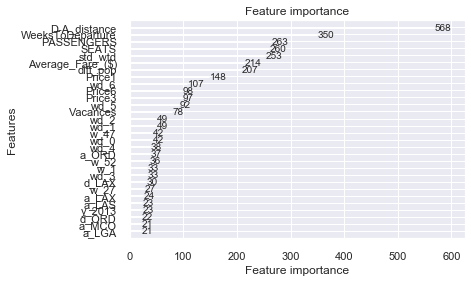

In [19]:
import lightgbm as lgb

d_train = lgb.Dataset(data_test, label= y_array)

param = {"max_depth": 5, "learning_rate" : 0.1, "num_leaves": 900, "n_estimators": 200}

model2 = lgb.train(params= param, train_set= d_train, categorical_feature= cat_col)

print("Plot feature importances…")

fig= plt.figure(figsize= (10, 10))
ax = lgb.plot_importance(model2, max_num_features= 30)
plt.show()

In [20]:
good_features= ["D-A_distance", "WeeksToDeparture", "SEATS", "PASSENGERS", "diff_pop", "Average Fare ($)"
                , "Price1", "wd_5", "wd_6", "Price3", "Price6", "Vacances", "w_47", "a_ORD"
                , "d_LAX", "w_52", "wd_0", "w_1", "wd_1", "wd_3", "d_LAX", "w_27"
                , "a_LAX", "a_LAS", "y_2013", "d_ORD", "a_MCO", "a_LGA"
               ]

### Rapide EDA

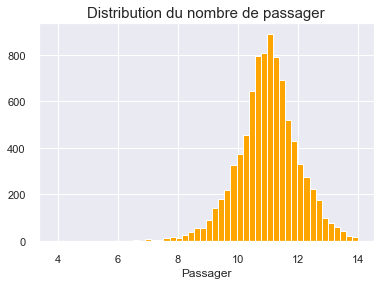

In [265]:
dataset= data_l4.copy()
dataset["nb_passager"]= y_array

fig= plt.figure(figsize= (6, 4))
plt.hist(dataset["nb_passager"], bins=50, color="orange")
plt.title("Distribution du nombre de passager", fontsize= 15, fontweight= 20)
plt.xlabel("Passager")
plt.show()

In [266]:
cat_col= [col for col in dataset.columns if dataset[col].nunique() <= 5]
num_col= [col for col in dataset.columns if col not in cat_col]

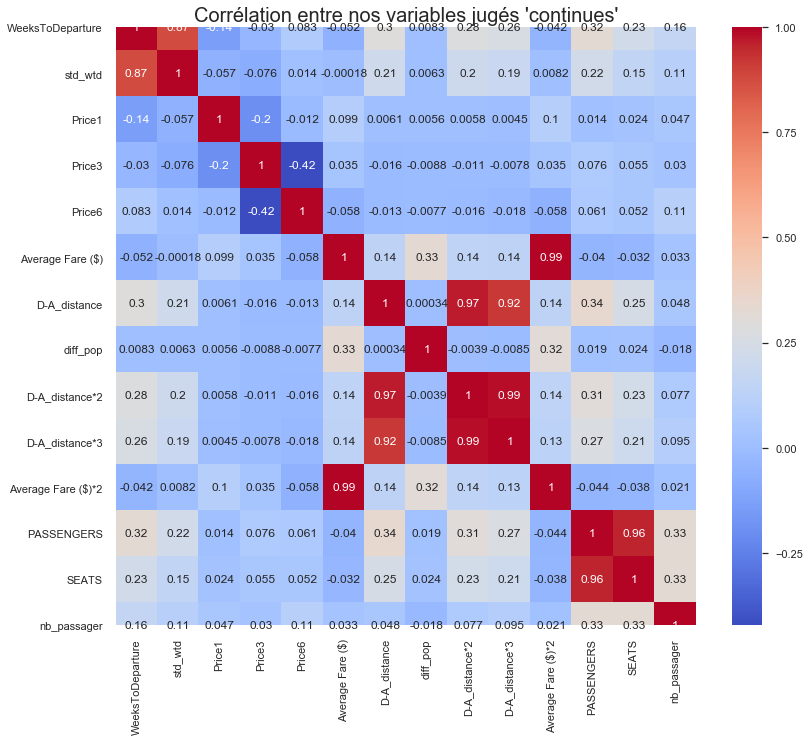

In [267]:
plt.figure(figsize=(13,11))
cor = dataset[num_col].corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title("Corrélation entre nos variables jugés 'continues'", fontsize= 20)
plt.show()

### Remarque:

- forte corrélation entre le nombre de semaine précédent la réservation et son écart-type (logique)
- forte corrélation entre mes distances
- forte corrélation entre mes prix des billets
- forte corrélation entre nombre de passager et nombre de siège

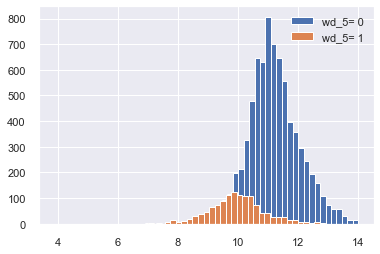

In [268]:
v_1= dataset[dataset["wd_5"] == 1]["nb_passager"].values
v_0= dataset[dataset["wd_5"] == 0]["nb_passager"].values

plt.hist(v_0, bins= 50, label= "wd_5= 0")
plt.hist(v_1, bins= 50, label= "wd_5= 1")

plt.legend()
plt.show()

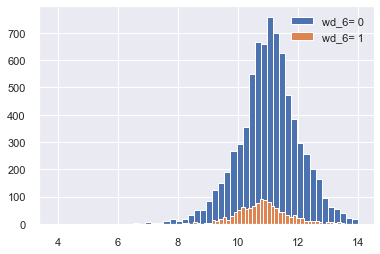

In [269]:
v_1= dataset[dataset["wd_6"] == 1]["nb_passager"].values
v_0= dataset[dataset["wd_6"] == 0]["nb_passager"].values

plt.hist(v_0, bins= 50, label= "wd_6= 0")
plt.hist(v_1, bins= 50, label= "wd_6= 1")

plt.legend()
plt.show()

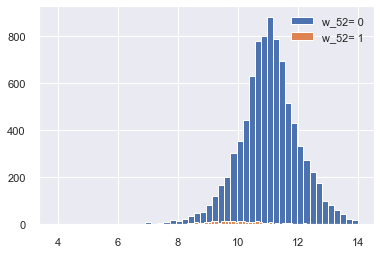

In [273]:
v_1= dataset[dataset["w_52"] == 1]["nb_passager"].values
v_0= dataset[dataset["w_52"] == 0]["nb_passager"].values

plt.hist(v_0, bins= 50, label= "w_52= 0")
plt.hist(v_1, bins= 50, label= "w_52= 1")

plt.legend()
plt.show()

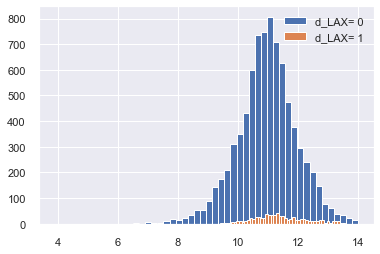

In [276]:
v_1= dataset[dataset["d_LAX"] == 1]["nb_passager"].values
v_0= dataset[dataset["d_LAX"] == 0]["nb_passager"].values

plt.hist(v_0, bins= 50, label= "d_LAX= 0")
plt.hist(v_1, bins= 50, label= "d_LAX= 1")

plt.legend()
plt.show()

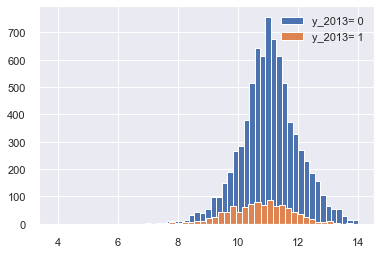

In [277]:
v_1= dataset[dataset["y_2013"] == 1]["nb_passager"].values
v_0= dataset[dataset["y_2013"] == 0]["nb_passager"].values

plt.hist(v_0, bins= 50, label= "y_2013= 0")
plt.hist(v_1, bins= 50, label= "y_2013= 1")

plt.legend()
plt.show()

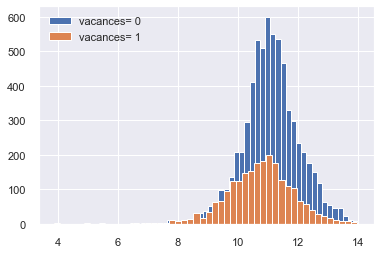

In [278]:
v_1= dataset[dataset["Vacances"] == 1]["nb_passager"].values
v_0= dataset[dataset["Vacances"] == 0]["nb_passager"].values

plt.hist(v_0, bins= 50, label= "vacances= 0")
plt.hist(v_1, bins= 50, label= "vacances= 1")

plt.legend()
plt.show()

# Remarque:

Avec la régression Lasso, la distribution du nombre de passager selon la modalité de la variable Vacances n'est pas différentiable ==> c'est pourquoi on préferera la feature selection faite à l'aide du LightGBM.

In [280]:
saved= dataset.to_csv("data/final_dataset.csv", index= False)

<a id= "model"><a/>
# Modélisation et prédiction

In [24]:
# # test
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test= train_test_split(data_l3[good_col], y_array, test_size= 0.2, random_state= 0)
rfr= RandomForestRegressor(random_state = 55
                           , n_estimators= 100
                           , min_samples_split= 3
                           , min_samples_leaf= 1
                           , max_features= 10
                           , max_depth= 10
                           , ccp_alpha= 0
                          )
rfr.fit(X_train, y_train)

prediction= rfr.predict(X_test)
print("RMSE: %.2f"
      % math.sqrt(np.mean((prediction - y_test) ** 2)))
# data_l3.head()

RMSE: 0.56


In [ ]:
# test 2
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor


X_train, X_test, y_train, y_test= train_test_split(data_l3,y_array, train_size= 0.8)


parameters_for_testing = {
    'learning_rate': [0.15, 0.1],
    'n_estimators': [3000, 5000],
    'num_leaves': [50, 30],
    'colsample_bytree' : [0.5, 0.8],
    'subsample' : [0.8, 0.9],
    'reg_alpha' : [0, 0.01],
    'reg_lambda' : [0.2, 0.1, 0]
    }

lgb_model = LGBMRegressor(objective= "root_mean_squared_error", boosting_type= "gbdt"
                           ,
)

gsearch1 = GridSearchCV(estimator = lgb_model, param_grid = parameters_for_testing, n_jobs=-1
                        ,scoring='neg_mean_squared_error', verbose= 2)

gsearch1.fit(X_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 33.5min


In [110]:
prediction1= gsearch1.predict(X_test)
print("RMSE: %.2f"
      % math.sqrt(np.mean((prediction1 - y_test) ** 2)))

8902

In [29]:
import numpy as np

from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split


# get some data
X_train, X_test, y_train, y_test= train_test_split(data_l3[good_features], y_array, train_size= 0.8)

lgb_model = LGBMRegressor(objective= "root_mean_squared_error", boosting_type= "gbdt")

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {
    'learning_rate': [0.025, 0.01, 0.02, 0.05, 0.08, 0.1],
    'n_estimators': [1000, 2000, 1500, 1800],
    'num_leaves': [2, 3, 5, 6, 10, 15, 20, 30],
    'colsample_bytree' : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'subsample' : [0.8, 0.9, 1, 0.7, 0.6, 0.5, 0.4],
    'reg_alpha' : [0, 0.25, 0.75, 0.1, 0.05, 0.01],
    'reg_lambda' : [0.25, 0.1, 0.2, 0.05, 0],
    'max_depth': [-1, 1, 2, 3, 4, 5]
    }

# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(lgb_model, param_distributions=param_dist, scoring= "neg_root_mean_squared_error",
                                   n_iter=n_iter_search, verbose= 1, cv= 5, n_jobs= -1)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.2min finished


RandomizedSearchCV took 316.46 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: -0.423 (std: 0.019)
Parameters: {'subsample': 0.7, 'reg_lambda': 0.25, 'reg_alpha': 0.01, 'num_leaves': 30, 'n_estimators': 1800, 'max_depth': -1, 'learning_rate': 0.05, 'colsample_bytree': 0.8}

Model with rank: 2
Mean validation score: -0.426 (std: 0.020)
Parameters: {'subsample': 0.8, 'reg_lambda': 0.25, 'reg_alpha': 0, 'num_leaves': 20, 'n_estimators': 1500, 'max_depth': 5, 'learning_rate': 0.08, 'colsample_bytree': 0.5}

Model with rank: 3
Mean validation score: -0.427 (std: 0.022)
Parameters: {'subsample': 0.7, 'reg_lambda': 0, 'reg_alpha': 0.01, 'num_leaves': 20, 'n_estimators': 2000, 'max_depth': -1, 'learning_rate': 0.01, 'colsample_bytree': 0.5}



In [31]:
prediction1= random_search.predict(X_test)
print("RMSE: %.2f"
      % math.sqrt(np.mean((prediction1 - y_test) ** 2)))

RMSE: 0.44


In [32]:
random_search.best_params_

{'subsample': 0.7,
 'reg_lambda': 0.25,
 'reg_alpha': 0.01,
 'num_leaves': 30,
 'n_estimators': 1800,
 'max_depth': -1,
 'learning_rate': 0.05,
 'colsample_bytree': 0.8}

In [35]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=2000, learning_rate=0.15)
model.fit(X_train, y_train)

0:	learn: 0.9392894	total: 20.1ms	remaining: 40.2s
1:	learn: 0.8893920	total: 26.6ms	remaining: 26.5s
2:	learn: 0.8461848	total: 32.8ms	remaining: 21.8s
3:	learn: 0.8114991	total: 38.5ms	remaining: 19.2s
4:	learn: 0.7832775	total: 44.8ms	remaining: 17.9s
5:	learn: 0.7600438	total: 49.8ms	remaining: 16.5s
6:	learn: 0.7378528	total: 53.9ms	remaining: 15.3s
7:	learn: 0.7233875	total: 57.7ms	remaining: 14.4s
8:	learn: 0.7092807	total: 61.6ms	remaining: 13.6s
9:	learn: 0.6954012	total: 65.7ms	remaining: 13.1s
10:	learn: 0.6844511	total: 74ms	remaining: 13.4s
11:	learn: 0.6727669	total: 80.9ms	remaining: 13.4s
12:	learn: 0.6633202	total: 86.8ms	remaining: 13.3s
13:	learn: 0.6563748	total: 92.6ms	remaining: 13.1s
14:	learn: 0.6470541	total: 98.8ms	remaining: 13.1s
15:	learn: 0.6373339	total: 105ms	remaining: 13s
16:	learn: 0.6306970	total: 111ms	remaining: 12.9s
17:	learn: 0.6226160	total: 118ms	remaining: 13s
18:	learn: 0.6169965	total: 124ms	remaining: 12.9s
19:	learn: 0.6119758	total: 136m

In [36]:
y_predict= model.predict(X_test)
print("RMSE: %.2f"
      % math.sqrt(np.mean((y_predict - y_test) ** 2)))

RMSE: 0.43


In [40]:
for i in [0, 0.2, 0.4, 0.5, 0.8, 1]:
    res1= prediction1 - y_test
    res2= y_predict - y_test
    print("Pour {} avec {}".format(i, math.sqrt(np.mean((res1*i + res2*(1-i)) ** 2))))

Pour 0 avec 0.4313908794653947
Pour 0.2 avec 0.42841163999929033
Pour 0.4 avec 0.4275955625727897
Pour 0.5 avec 0.4280038575714115
Pour 0.8 avec 0.4324694175943211
Pour 1 avec 0.43808697462004403


In [98]:
# from sklearn.ensemble import RandomForestRegressor


# params= {
#  'max_depth': [2, 3, 10, 20, 30],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [1000, 1500, 2000]}


# rfr= RandomForestRegressor(random_state= 55)

# gsearch2 = GridSearchCV(estimator = rfr, param_grid = params, n_jobs=-1
#                         ,scoring='neg_mean_squared_error', cv= 3, verbose= 2)


# gsearch2.fit(X_train, y_train)

In [27]:
prediction1= gsearch1.predict(X_test)
print("RMSE: %.2f"
      % math.sqrt(np.mean((prediction1 - y_test) ** 2)))

RMSE: 0.35


In [107]:
import xgboost

parameters_for_testing = {
   'colsample_bytree':[0.4, 0.8],
   'gamma':[0],
   'min_child_weight':[1.5, 6, 10],
   'learning_rate':[0.1, 0.07, 0.15, 0.05, 0.02],
   'max_depth':[1, 2, 3, 4, 5, 6, 7, 8 ,9 ,10],
   'reg_alpha':[0.05, 0.01],
   'reg_lambda':[0.01, 0.05, 0.1],
   'subsample':[0.6,0.9]  
}

xgb_model = xgboost.XGBRegressor(objective='reg:squarederror')


n_iter_search = 100
random_search = RandomizedSearchCV(xgb_model, param_distributions=parameters_for_testing, scoring= "neg_root_mean_squared_error",
                                   n_iter=n_iter_search, verbose= 1, cv= 5)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 15.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=0, reg_...
                   param_distributions={'colsample_bytree': [0.4, 0.8],
                                        'gamma': [0],
                                        'learning_rate': [0.1,

In [ ]:
prediction2= random_search.predict(X_test)
print("RMSE: %.2f"
      % math.sqrt(np.mean((prediction2 - y_test) ** 2)))

In [ ]:
random_search.best_params_

In [ ]:
pred_test= (prediction1 + prediction2)/2
print("RMSE: %.2f"
      % math.sqrt(np.mean((pred_test - y_test) ** 2)))

In [28]:
gsearch1.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'n_estimators': 2000,
 'num_leaves': 20,
 'reg_alpha': 0,
 'reg_lambda': 3,
 'subsample': 0.8}

In [41]:
gsearch2.best_params_

{'colsample_bytree': 0.55,
 'learning_rate': 0.08,
 'n_estimators': 1000,
 'num_leaves': 30,
 'reg_alpha': 1,
 'reg_lambda': 2,
 'subsample': 0.5}

In [58]:
from catboost import Pool, CatBoostRegressor

# train_pool = Pool(X_train, y_train) 
cbm0 = CatBoostRegressor(depth=5, learning_rate=0.1,
eval_metric='RMSE')

# cbm0.fit(train_pool)
cbm0.fit(X_train, y_train)

# test_pool = Pool(X_test)
predict_cat = cbm0.predict(X_test)

0:	learn: 0.9643605	total: 4.45ms	remaining: 4.44s
1:	learn: 0.9402092	total: 8.82ms	remaining: 4.4s
2:	learn: 0.9180979	total: 12.6ms	remaining: 4.19s
3:	learn: 0.8970029	total: 16.8ms	remaining: 4.18s
4:	learn: 0.8791809	total: 20.4ms	remaining: 4.07s
5:	learn: 0.8647554	total: 24.5ms	remaining: 4.06s
6:	learn: 0.8505219	total: 28.8ms	remaining: 4.09s
7:	learn: 0.8350804	total: 34.3ms	remaining: 4.25s
8:	learn: 0.8241009	total: 40.7ms	remaining: 4.48s
9:	learn: 0.8116663	total: 46.6ms	remaining: 4.61s
10:	learn: 0.7971701	total: 51.7ms	remaining: 4.65s
11:	learn: 0.7854233	total: 56.6ms	remaining: 4.66s
12:	learn: 0.7776663	total: 61.3ms	remaining: 4.66s
13:	learn: 0.7673621	total: 65.2ms	remaining: 4.59s
14:	learn: 0.7606527	total: 69.6ms	remaining: 4.57s
15:	learn: 0.7519800	total: 73.9ms	remaining: 4.55s
16:	learn: 0.7450112	total: 77.6ms	remaining: 4.49s
17:	learn: 0.7350912	total: 81.8ms	remaining: 4.46s
18:	learn: 0.7284989	total: 85.7ms	remaining: 4.42s
19:	learn: 0.7225020	to

In [59]:
# predic= gsearch2.predict(X_test)
print("RMSE: %.2f"
      % math.sqrt(np.mean((predict_cat - y_test) ** 2)))

RMSE: 0.36


In [60]:
pred_test= (prediction1 + predict_cat)/2
print("RMSE: %.2f"
      % math.sqrt(np.mean((pred_test - y_test) ** 2)))

RMSE: 0.35




### Best model (RMSE= 0.35) = un moyenne arithmétique de la prédiction d'un CatBoost et d'un LightGBM
{'colsample_bytree': 0.8,
 'gamma': 1,
 'learning_rate': 0.07,
 'max_depth': 4,
 'n_estimators': 1000,
 'subsample': 0.8}

<a id= "conclu"><a/>
# Résultat RAMP et conclusion
----
    
### Position dans le leaderboard à date (09/03/2020):
- <font color= "orange">Avec troll: 1er et RMSE de 0.0 ; 
J'ai récupéré les fichiers de test et de train et nous n'avons pas prédit mais uniquement renvoyé les fichiers. La plateforme est géniale, mais elle offre la possibilité de regarder les algorithmes des autres. Le vrai premier (sans me prendre en compte mon résultat de 0.0) au classement a par exemple uniquement recopié le code du deuxième, et a rajouté des zéros dans l'hyperparamétrage, ce qui ne me semble pas fair. C'est pourquoi, nous avons voulu bloquer ce genre de comportement en ayant le score parfait.<font/>
    
    
- <font color= "green">Véritable score: 3ème et RMSE de 0.268 ; le modèle utilisé est un LightGBM, avec un temps de train de 130sec et un temps de validation de 370sec. Ce modèle avec ces résultats n'a pas été fait avec les mêmes données que nous avons présenté dans ce notebook. __ET surtout, c'était sans faire de feature selection que nous avions les meilleurs métriques sur RAMP (en tout cas avec ce modèle)__.<font/>

    
Avec les données que nous présentons dans le notebook, notre score a été de 0.285 (submission: MoSEF_AHOuAhou_v6), mais aucune feature selection n'avait été faite.